<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей:" data-toc-modified-id="Обучение-моделей:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение моделей:</a></span></li><li><span><a href="#Дерево-решений:" data-toc-modified-id="Дерево-решений:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений:</a></span></li><li><span><a href="#Случайный-лес:" data-toc-modified-id="Случайный-лес:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score,roc_curve 
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('/datasets/Churn.csv', sep=',')    
pd.options.display.max_columns = None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
display(df.head(5))
display(df.tail(5))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [4]:
df.duplicated().sum()

0

In [5]:
df[df['Tenure'].isna()].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


Так как пропусков не много, мы их удалим, чтобы не искажать наше исследование.

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
RowNumber          9091 non-null int64
CustomerId         9091 non-null int64
Surname            9091 non-null object
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Мы удалили не нужные нам столбцы:
* RowNumber
* CustomerId
* Surname


Мы их удаляем по причине того, что эти данные врядли повлияют на уход клиента из банка.

Нужно перевести два столбца из категориальных даных в числовые, воспользуемся техникой OHE так как она подходит для всех моделей:

In [8]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разделим наши данные:

In [9]:
features = df_ohe.drop('Exited',axis=1)
target = df_ohe['Exited']

Так как нужно создать сначала тестовую выборку применим метод train_test_split дважды:

Разделим данные на 0.8 и 0.2
Разделим получившиеся данные на 0.25 и 0.75 
В результате получим правильное разделение данных на обучающие 0.6 и валидационные 0.2 и тестовые 0.2

Получим тестовую выборку:

In [10]:
features_80, features_test, target_80, target_test = train_test_split(
    features, target, test_size=0.2, random_state=180495)

Получим валидационную выборку и обучающие данные:

In [11]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_80, target_80, test_size=0.25, random_state=180495)

In [12]:
display(features_test.shape)
display(target_test.shape)

display(features_train.shape)
display(target_train.shape)

display(features_valid.shape)
display(target_valid.shape)

(1819, 11)

(1819,)

(5454, 11)

(5454,)

(1818, 11)

(1818,)

Некоторые столбцы сильно отличаются по маштабу, стандартизируем их

In [13]:
pd.options.mode.chained_assignment = None
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

In [14]:
display(target_train.value_counts(normalize = 1))
display(target_valid.value_counts(normalize = 1))

0    0.803447
1    0.196553
Name: Exited, dtype: float64

0    0.79868
1    0.20132
Name: Exited, dtype: float64

Как видно положительного класса 20 процентов и отрицательного 80, соотношение один к четырем.
Скорей всего результаты предсказаний моделей будут сильно склоняться к одному варианту ответов

### Обучение моделей:
**Логистическая регрессия:**

Обучаем модель:

In [15]:
model_log = LogisticRegression(random_state=180495, solver='lbfgs') 
model_log.fit(features_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=180495, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Проверим точность модели

In [16]:
predictions = model_log.predict(features_valid)
display("Accuracy:", accuracy_score(predictions, target_valid))
display("F1:", f1_score(predictions, target_valid))

'Accuracy:'

0.8184818481848185

'F1:'

0.3008474576271186

Метрика F1 не удовлетворяет нашим требованиям

### Дерево решений:

In [17]:
model_tree = None
best_result_F1 = 0

for depth in range(2, 14):
    model_1= DecisionTreeClassifier(random_state=12345, max_depth=depth)  
    model_1.fit(features_train,target_train)
    predictions = model_1.predict(features_valid)
    result_1 = f1_score(target_valid, predictions) 
    if result_1 > best_result_F1:
        model_tree = model_1
        best_result_F1 = result_1 
        
print(model_tree)
print("F1:", best_result_F1) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
F1: 0.5864406779661018


Метрика F1 почти удовлетворяет нашим требованиям, но все же не достаточно велика

### Случайный лес:

In [18]:
model_forest = None
best_result = 0
for est in range(1, 101):
    model = RandomForestClassifier(random_state=180495, n_estimators=est) 
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions) 
    if result > best_result:
        model_forest = model
        best_result = result 

print(model_forest)
print("F1:", best_result)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=57,
                       n_jobs=None, oob_score=False, random_state=180495,
                       verbose=0, warm_start=False)
F1: 0.5820642978003384


Метрика F1 снова не дала нужного результата.
Проверим какой баланс классов дают наши модели.

In [19]:
tree_p = pd.Series(model_tree.predict(features_valid))
forest_p = pd.Series(model_forest.predict(features_valid))
log_p = pd.Series(model_log.predict(features_valid))
print("Доли ответов:" "дерево решений",tree_p.value_counts(normalize = 1),
       "случайный лес ",forest_p.value_counts(normalize = 1), 
       "логистческая регрессия",log_p.value_counts(normalize = 1), end='')

Доли ответов:дерево решений 0    0.876788
1    0.123212
dtype: float64 случайный лес  0    0.876238
1    0.123762
dtype: float64 логистческая регрессия 0    0.941694
1    0.058306
dtype: float64

Посмотрим какую точность, полноту, AUC-ROC и F1 показывают наши модели

In [20]:
def metric(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))
    print("AUC-ROC", roc_auc_score(target_valid, prediction))

In [21]:
display('Логистическая регрессия:')
metric(target_valid, log_p)
display('Дерево решений:')
metric(target_valid, tree_p )
display('Случайный лес:')
metric(target_valid,forest_p)

'Логистическая регрессия:'

Полнота 0.19398907103825136
Точность 0.6698113207547169
F1-мера 0.3008474576271186
AUC-ROC 0.5849421939213296


'Дерево решений:'

Полнота 0.4726775956284153
Точность 0.7723214285714286
F1-мера 0.5864406779661018
AUC-ROC 0.7187768143431332


'Случайный лес:'

Полнота 0.46994535519125685
Точность 0.7644444444444445
F1-мера 0.5820642978003384
AUC-ROC 0.7167219888903942


Низкое значние F1 свидетельствует о низком качестве моделей, уберем дисбаланс классов.

## Борьба с дисбалансом

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=180495)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=180495)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=180495)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Проверим баланс после изменений

In [23]:
target_downsampled.value_counts(normalize = 1)

0    0.505535
1    0.494465
Name: Exited, dtype: float64

Обучим модели на новых данных

In [24]:
model_log_d = LogisticRegression(solver = 'liblinear', random_state=180495)
model_log_d.fit(features_downsampled, target_downsampled)

model_tree_d = None
best_result_d = 0

for depth in range(2, 14):
    model_d= DecisionTreeClassifier(random_state=12345, max_depth=depth)  
    model_d.fit(features_downsampled, target_downsampled)
    predictions = model_d.predict(features_valid)
    result_d = f1_score(target_valid, predictions) 
    if result_d > best_result_d:
        model_tree_d = model_d
        best_result_d = result_d 

model_forest_d = None
best_result_fd = 0

for est in range(1, 101):
    model_fd = RandomForestClassifier(random_state=180495, n_estimators=est) 
    model_fd.fit(features_downsampled, target_downsampled) 
    predictions = model_fd.predict(features_valid)
    result_fd = f1_score(target_valid, predictions) 
    if result_fd > best_result_fd:
        model_forest_d = model_fd
        best_result_fd = result_fd 
        
        
display(model_tree_d)
display(model_forest_d)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=180495,
                       verbose=0, warm_start=False)

In [25]:
log_d_p = pd.Series(model_log_d.predict(features_valid))
tree_d_p =pd.Series(model_tree_d.predict(features_valid))
forest_d_p = pd.Series(model_forest_d.predict(features_valid))
display('Логистическая регрессия:')
display(metric(target_valid, log_d_p))
display('Дерево решений:')
display(metric(target_valid, tree_d_p))
display('Случайный лес:')
display(metric(target_valid,forest_d_p))

'Логистическая регрессия:'

Полнота 0.6830601092896175
Точность 0.3816793893129771
F1-мера 0.48971596474045054
AUC-ROC 0.7020672447274534


None

'Дерево решений:'

Полнота 0.819672131147541
Точность 0.46296296296296297
F1-мера 0.591715976331361
AUC-ROC 0.7900013548299688


None

'Случайный лес:'

Полнота 0.76775956284153
Точность 0.5081374321880651
F1-мера 0.6115342763873776
AUC-ROC 0.790215869575035


None

In [26]:
display("Доли ответов:" "дерево решений",tree_d_p.value_counts(normalize = 1))
display("случайный лес ",forest_d_p.value_counts(normalize = 1))
display("логистческая регрессия",log_d_p.value_counts(normalize = 1))

'Доли ответов:дерево решений'

0    0.643564
1    0.356436
dtype: float64

'случайный лес '

0    0.69582
1    0.30418
dtype: float64

'логистческая регрессия'

0    0.639714
1    0.360286
dtype: float64

Попробуем увеличить выборку:

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=180495)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [28]:
target_upsampled.value_counts(normalize = 1)

0    0.505421
1    0.494579
Name: Exited, dtype: float64

Обучим модели на новых данных:

In [29]:
model_log_u = LogisticRegression(solver = 'liblinear', random_state=180495)
model_log_u.fit(features_upsampled, target_upsampled)

model_tree_u = None
best_result_u = 0

for depth in range(2, 14):
    model_u= DecisionTreeClassifier(random_state=12345, max_depth=depth)  
    model_u.fit(features_upsampled, target_upsampled)
    predictions = model_u.predict(features_valid)
    result_u = f1_score(target_valid, predictions) 
    if result_u > best_result_u:
        model_tree_u = model_u
        best_result_u = result_u 

model_forest_u = None
best_result_fu = 0

for est in range(1, 101):
    model_fu = RandomForestClassifier(random_state=180495, n_estimators=est) 
    model_fu.fit(features_upsampled, target_upsampled) 
    predictions = model_fu.predict(features_valid)
    result_fu = f1_score(target_valid, predictions) 
    if result_fu > best_result_fu:
        model_forest_u = model_fu
        best_result_fu = result_fu 
        
        
display(model_tree_u)
display(model_forest_u)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=180495,
                       verbose=0, warm_start=False)

In [30]:
log_u_p = pd.Series(model_log_u.predict(features_valid))
tree_u_p =pd.Series(model_tree_u.predict(features_valid))
forest_u_p = pd.Series(model_forest_u.predict(features_valid))
display('Логистическая регрессия:')
display(metric(target_valid, log_d_p))
display('Дерево решений:')
display(metric(target_valid, tree_d_p))
display('Случайный лес:')
display(metric(target_valid,forest_d_p))

'Логистическая регрессия:'

Полнота 0.6830601092896175
Точность 0.3816793893129771
F1-мера 0.48971596474045054
AUC-ROC 0.7020672447274534


None

'Дерево решений:'

Полнота 0.819672131147541
Точность 0.46296296296296297
F1-мера 0.591715976331361
AUC-ROC 0.7900013548299688


None

'Случайный лес:'

Полнота 0.76775956284153
Точность 0.5081374321880651
F1-мера 0.6115342763873776
AUC-ROC 0.790215869575035


None

Как видно по мере F1 увеличение выборки оказалось немного лучше  по эфективности
чем уменьшение, а лучше всех по по этой метрике себя показала модель случайного леса. Попробуем ее улучшить.

Переберем список параметров с помощью GridSearchCV:

In [31]:
rfc = RandomForestClassifier()
params =  {'n_estimators': [10, 30, 50, 80, 100],
               'max_depth' : [4, 5, 6, 7, 8],
               'class_weight': ['balanced', 'balanced_subsample']}

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid = params, scoring = 'f1', refit='f1', cv=5)
grid_search_rfc.fit(features_train,target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [32]:
grid_search_rfc.best_params_

{'class_weight': 'balanced_subsample', 'max_depth': 8, 'n_estimators': 80}

In [33]:
predictions = grid_search_rfc.best_estimator_.predict(features_valid)
display('Лучшая модель')
display(metric(target_valid,predictions))

'Лучшая модель'

Полнота 0.7103825136612022
Точность 0.5990783410138248
F1-мера 0.65
AUC-ROC 0.7952739014587001


None

Нам удалось улучшить модель, об этом сведетельствует значение F1

## Тестирование модели

In [34]:
predictions_test = grid_search_rfc.best_estimator_.predict(features_test)
display('Метрики лучшей модели на тестовой выборке:')
display(metric(target_test,predictions_test))

'Метрики лучшей модели на тестовой выборке:'

Полнота 0.6442307692307693
Точность 0.6276346604215457
F1-мера 0.6358244365361803
AUC-ROC 0.7654510938099677


None

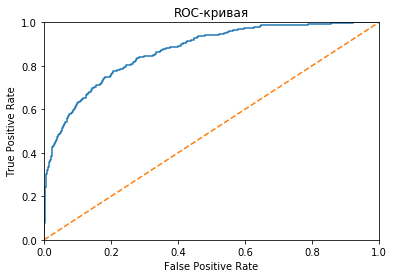

In [35]:
one_valid = grid_search_rfc.best_estimator_.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

## Вывод

Первычный аназиз данных показал дисбаланс классов, а именно отрицательного к положительному. Мы провели предобработку данных, удалили пропустки и сделали OHE. Провели проверку трех моделей и выявили лучшую модель ей оказалась модель = случайный лес. Проверка на тестовой выборке подтвердила работоспособность модели. Значение F1 = 0.61